## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = combined.count()["Mouse ID"]

mice_count

1893

In [3]:
combined.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_dubs = combined.groupby(["Mouse ID","Timepoint"]).count()

combined_dubs

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mice_count = combined.drop_duplicates(subset=['Mouse ID','Timepoint'])

dup_mice_count.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
dup_mice_count.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Tumors = dub_mice_count['Tumor Volume (mm3)']

mean_numpy = np.mean(Tumors)
print(f"The mean tumor volume is {mean_numpy}")

median_numpy = np.median(Tumors)
print(f"The median tumor volume is {median_numpy}")

mode_scipy = st.mode(Tumors)
print(f"The mode tumor volume is {mode_scipy}")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



NameError: name 'dub_mice_count' is not defined

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_reg = dup_mice_count.groupby('Drug Regimen')

drug_reg.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [7]:
timepoints = drug_reg['Drug Regimen'].count()

timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

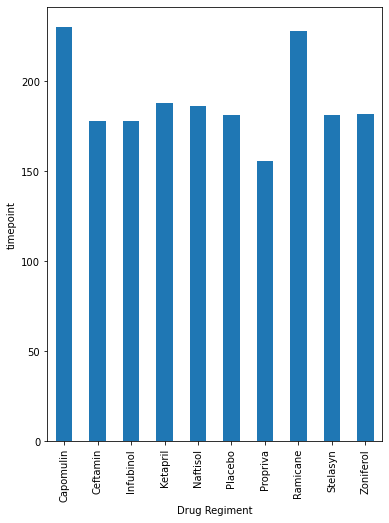

<Figure size 432x288 with 0 Axes>

In [8]:
count_chart = timepoints.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regiment")
count_chart.set_ylabel("timepoint")

plt.show()
plt.tight_layout()

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepoints))
tick_locations = [value for value in x_axis]

TypeError: unhashable type: 'numpy.ndarray'

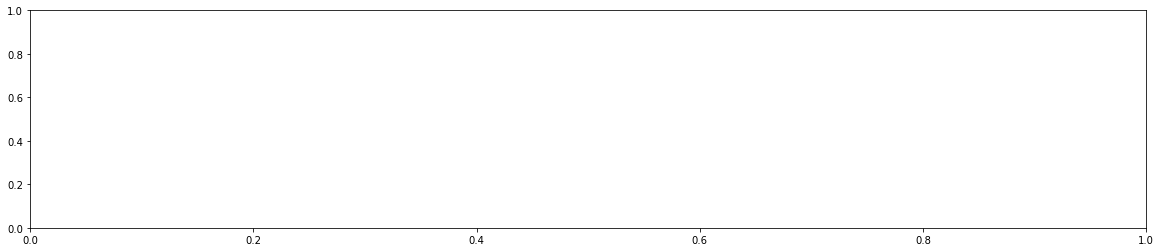

In [21]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, drug_reg["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_reg["Drug Regiment"], rotation="vertical")

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pa = dup_mice_count.groupby('Sex')
Mice = dup_mice_count.groupby(['Sex'])

Mice.count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


In [56]:
Gender = dup_mice_count['Mouse ID'].count()

Gender

1888

In [59]:
Mice.plot(kind='pie', figsize=(6,8), y='Mouse ID')

# Set the xlabel and ylabel using class methods


plt.show()
plt.tight_layout()

TypeError: '<' not supported between instances of 'str' and 'int'

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Sex, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


NameError: name 'Sex' is not defined

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
